In [1]:
import torch

# Нейронная сеть на Pytorch

## Введение

Базовой единицей фреймворка является структура, которая называется torch.Tensor. Tensor - это аналог numpy.array, многие методы работы с torch.Tensor в точности повторяют методы numpy array.

Тензор — это тот тип данных, с которыми работают все нейросети в PyTorch. Матрицы весов слоев сети — это тензоры. Данные, которые мы подаем на вход сети тоже обязательно должны быть приведены к типу torch.Tensor. Ну и выход сети, разумеется, тоже будет иметь тип torch.Tensor.

In [2]:
# модуль, в котором определены все классы слоев сетей и функций активации
import torch.nn as nn

n = 5
m = 3
# аргумент bias принимает значения True и False и определяет, будет ли в слое
# применяться bias. Если bias=False, вектор байеса равен нулю. True - default
# тут сразу же инициализируются веса 
linear_layer = nn.Linear(n, m, bias=True)

In [3]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

In [4]:
linear_layer.weight

Parameter containing:
tensor([[ 0.2882,  0.1029,  0.1476,  0.1998, -0.3552],
        [ 0.0597,  0.2789,  0.2204,  0.2829, -0.3960],
        [-0.0583,  0.2286,  0.3763, -0.1856,  0.0006]], requires_grad=True)

Далее — функция активации. Многие известные функции активации реализованы в модуле nn и продублированы в модуле nn.functional. Выберем какую-нибудь из них, например, гиперболический тангенс (tanh).

In [5]:
# Можно использовать такой вариант:

# import torch.nn.functional as F
# activation = F.tanh

# или такой вариант:
activation = nn.Tanh()

In [6]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

Теперь проход некоторого тензора с данными через такой полносвязный слой будет задан при помощи последовательности команд:

In [7]:
random_input = torch.rand(5)

x = linear_layer(random_input)
output = activation(x)
output

tensor([ 0.1133,  0.4980, -0.0533], grad_fn=<TanhBackward0>)

Обратим внимание на `grad_fn=<TanhBackward0>`. Такая приписка будет появляться на всех тензорах, которые являются обучающими параметрами в нейросети. Это значит, что для данного тензора в процессе обучения сети будет вычисляться градиент, с помощью которого значения тензора будут обновляться.

## Полносвязная нейросеть для бинарной классификации


Зададим датасет для бинарной классификации точек на плоскости:

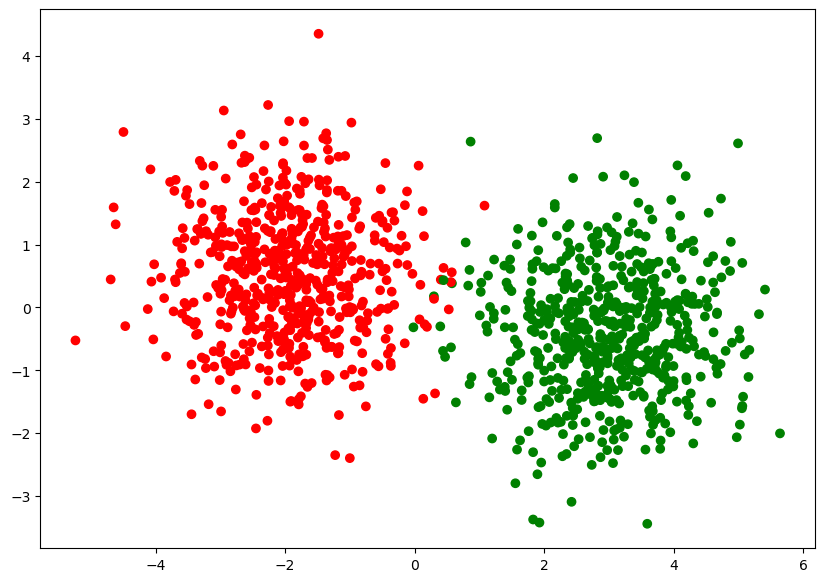

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# генерируем 1200 точек, распределенных вокруг двух центров: (-2,0.5) и (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)

In [10]:
X_train

array([[ 4.39020755,  0.05781031],
       [ 2.97248509,  1.2722516 ],
       [ 2.17240978, -0.41385612],
       ...,
       [ 1.39244014, -1.26272478],
       [ 2.32429192, -0.46584758],
       [-0.52210596, -0.01827022]])

In [11]:
y_train

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

Давайте зададим нейронную сеть с двумя слоями. Пусть в скрытых слоях будет пять нейронов. В качестве функции активации выберем сигмоиду.
Нейросеть задается в виде класса, который наследуется от абстрактного класса Module. Для задания нейросети достаточно определить у класса методы __init__ и __forward__. В методе __init__ обычно прописываются слои и артибуты сети, а в __forward__ — то, как нейросеть будет обрабатывать данные, поданные ей на вход.

In [12]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid() # можно заменить на nn.Tanh / nn.ReLU / ...

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):
        """
        params:
            x (torch.Tensor): данные, поданные на вход сети
        """

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

In [13]:
model = Net()
nn_prediction = model(torch.FloatTensor(X_test))
nn_prediction = nn_prediction.tolist()
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

In [14]:
nn_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Визуализируем точки тестовой выборки и покрасим их в цвета в зависимости от того, к какому классу сеть отнесла эти точки:

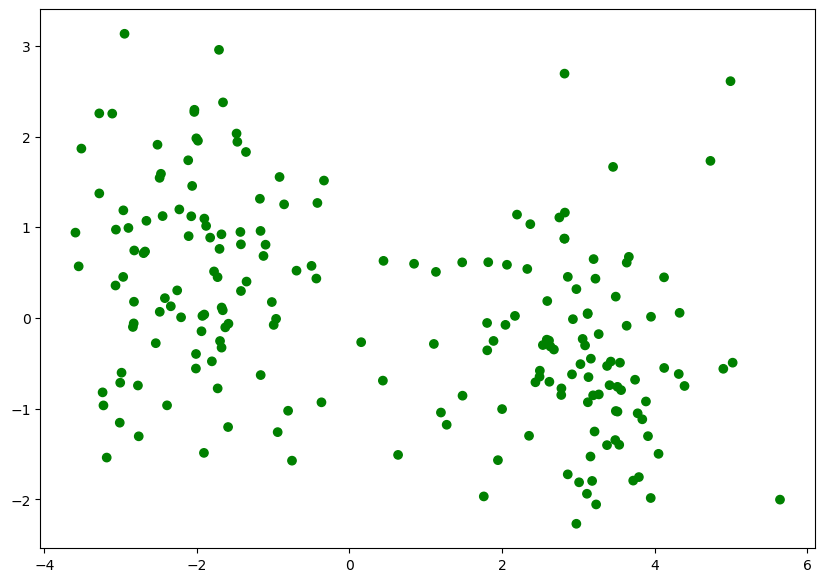

In [15]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Полученный результат ожидаем, поскольку наша нейронная сеть не обучена. Давайте обучим её.

## Обучение нейронной сети в Pytorch

При написании класса сети в PyTorch нам ну нужно самостоятельно реализовывать вычисление производных и код обновления весов. Внутри PyTorch алгоритм вычисления частных производных лосс-функции по весам сети реализован с помощью модуля autograd. На основе строения функции сети, заданной в forward, autograd понимает, как выглядит граф вычислений сети, и при вызове метода backward у последнего элемента графа (лосс-функции), проходит по графу в обратном направлении, вычисляя все градиенты.

А мы перейдем к написанию функции `train` для обучения нашей нейронной сети.

**В обучении сети участвуют следующие сущности:**
- сама нейросеть
- лосс-функция
- оптимизатор (optimizer)

**Что такое оптимизатор:**

Оптимизатор — это сущность, которая отвечает за обновление параметров сети на основе их текущих значений и значений их производных. То есть, в алгоритме стохастического спуска оптимизатор отвечает за строчку, обведенную красным:
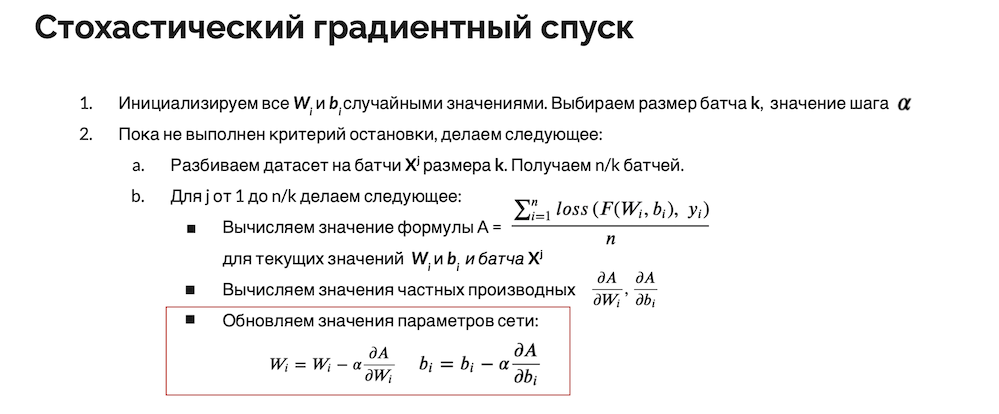

При вызове метода .backward() лосс-функции для всех весов сети вычисляются производные. После этого оптимизатор обновляет все веса сети с помощью этих вычисленных производных.

Тут может возникнуть вопрос: зачем нужна отдельная сущность "оптимизатор" для такой простой операции обновления весов? Казалось бы, всего-то нужно для каждого параметра сети отнять от его старого значения значение его производной, умноженной на learning rate. Почему бы не делать это сразу во время backward, во время того, как autograd (авто-градиент) вычисляет производные?

Ответ тут такой: существуют разные алгоритмы обновления весов сети, т.е. разные алгоритмы оптимизации весов. Стохастический градиентный спуск — это базовый, самый простой вариант. К нему можно добавить некоторые трюки, которые сделают обучение сети еще эффективнее. И чтобы можно было обучать одну и ту же сеть с помощью разных алгоритмов оптимизации, за алгоритм оптимизации отвечает отдельная сущность — optimizer.


In [16]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания нашей модели
        y_pred = model(X)

        # Посчитаем значение функции потерь  на полученном предсказании
        loss = criterion(y_pred, y)

        # Выполним подсчёт новых градиентов
        loss.backward()
        # Выполним шаг градиентного спуска
        optimizer.step()
        # Обнулим сохраненные у оптимизатора значения градиентов
        # перед следующим шагом обучения
        optimizer.zero_grad()

    return model

In [17]:
model = Net()

Объявим лосс-функцию и оптимизатор, и обучим сеть на 30 эпохах:

In [18]:
# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [19]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # size [1000] -> [1000, 1] ,view - как reshape в numpy

model = train(model, X_train, y_train, criterion, optimizer, 150)

  0%|          | 0/150 [00:00<?, ?it/s]

In [20]:
with torch.no_grad(): #то, что написано внутри модуля, не должно порождать вычисление производных
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

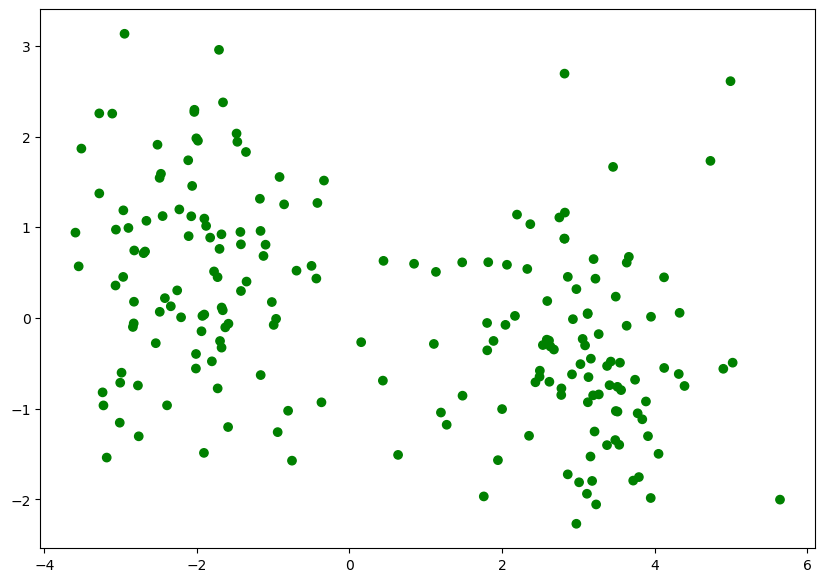

In [21]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

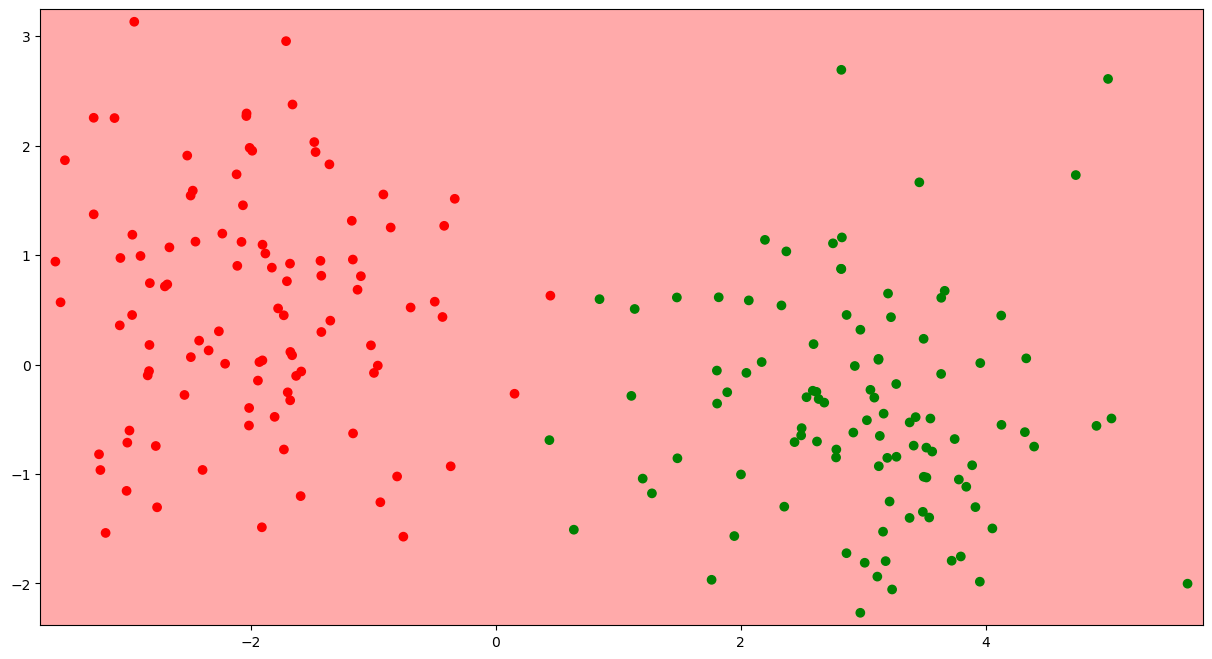

In [22]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))
Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

## Dataloader и обучение по мини-батчам
Даталоадер принимает на вход данные в виде массива пар [($x_1$, $y_1$), ..., ($x_i$, $y_i$), ...]

In [23]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

Здесь:
- batch_size — размер батча, на которые даталоадер будет делить данные перед каждой эпохой;
- shuffle — если True, то перед каждой эпохой и делением на батчи данные будут перемешаны. Shuffle обычно ставится True для обучающих данных, и False для тестовых.

Нам нужно также немного изменить функцию обучения сети, чтобы реализовать обучение по мини-батчам:

In [24]:
import tqdm
from tqdm.auto import tqdm

def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам даталоадера
        for X_batch, y_batch in loader:
            # Вычислим предсказания нашей модели
            y_pred = model(X_batch)

            # Посчитаем значение функции потерь  на полученном предсказании
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Выполним подсчёт новых градиентов
            loss.backward()
            # Выполним шаг градиентного спуска
            optimizer.step()
            # Обнулим сохраненные у оптимизатора значения градиентов
            # перед следующим шагом обучения
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

In [25]:
model = Net()

# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(NN.parameters(), lr=1e-4)

In [26]:
model = train_stochastic(model, train_loader, criterion, optimizer, 350)

  0%|          | 0/350 [00:00<?, ?it/s]

curr_loss 0.813385546207428
curr_loss 0.812573853880167
curr_loss 0.8098752126097679
curr_loss 0.8105521164834499
curr_loss 0.8088940717279911
curr_loss 0.8088412396609783
curr_loss 0.8066408224403858
curr_loss 0.806491244584322
curr_loss 0.8033909387886524
curr_loss 0.8032841235399246
curr_loss 0.8012621253728867
curr_loss 0.8004302009940147
curr_loss 0.7992707565426826
curr_loss 0.8006405308842659
curr_loss 0.799385990947485
curr_loss 0.7946112677454948
curr_loss 0.7943521440029144
curr_loss 0.7945501692593098
curr_loss 0.7921284660696983
curr_loss 0.7912062592804432
curr_loss 0.7894199565052986
curr_loss 0.7887923829257488
curr_loss 0.7883731871843338
curr_loss 0.7879626750946045
curr_loss 0.7856888435781002
curr_loss 0.7849929593503475
curr_loss 0.7836260907351971
curr_loss 0.7839226499199867
curr_loss 0.7821205854415894
curr_loss 0.7815224677324295
curr_loss 0.7798631973564625
curr_loss 0.7790429033339024
curr_loss 0.7785007655620575
curr_loss 0.7742825970053673
curr_loss 0.776189

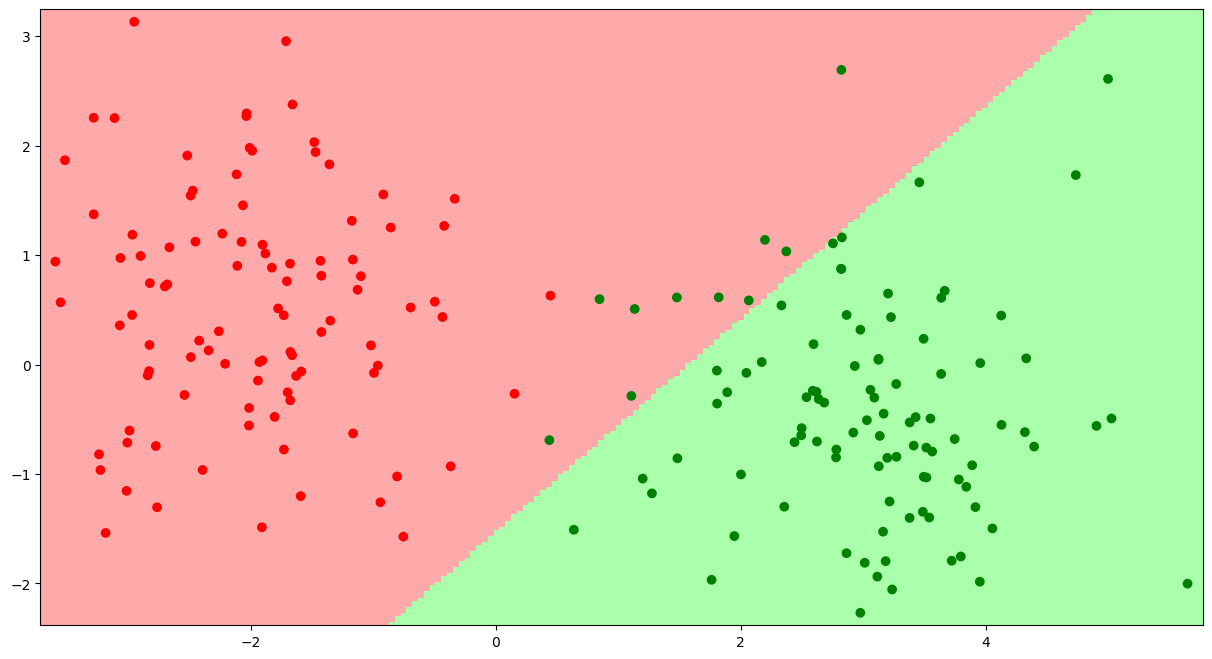

In [27]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

## nn.Sequential

В PyTorch есть еще один способ задания структуры нейросети, через nn.Sequential. Выглядит это так:

In [28]:
model = nn.Sequential(
                   nn.Linear(2, 2, bias=True),
                   nn.Sigmoid(),
                   nn.Linear(2, 1, bias=True),
                   nn.Sigmoid()
                   )

Теперь с переменной model можно обращаться точно так же, как мы делали это выше. Эту сеть можно обучить и получать ответы на тестовых данных.

Этот способ создания сети выглядит проще (не нужно писать никакой класс и никакой forward), но он менее гибок. Дело в том, что, используя nn.Sequential, мы задаем только слои сети, и выполняться они будут при вызове сети ровно в том порядке, в котором мы их задали. Отсюда и название структуры Sequential — "последовательный". В случае же описания сети в виде класса мы могли в forward определять вид прохождения входа по сети сами. Например, могли бы сделать такую нейросеть:

In [29]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc11 = nn.Linear(2, 2)
        self.act11 = nn.Sigmoid()

        self.fc12 = nn.Linear(2, 2)
        self.act12 = nn.Sigmoid()

        self.fc2 = nn.Linear(4, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x1, x2):

        x1 = self.fc11(x1)
        x1 = self.act11(x1)

        x2 = self.fc12(x2)
        x2 = self.act12(x2)

        x = torch.cat([x1, x2], dim=1)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Или можно даже делать так:

In [30]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc11 = nn.Linear(2, 2)
        self.act11 = nn.Sigmoid()

        self.fc12 = nn.Linear(2, 2)
        self.act12 = nn.Sigmoid()

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x, mode='left'):

        if mode == 'left':
            x = self.fc11(x)
            x = self.act11(x)

        elif mode == 'right':
            x = self.fc12(x2)
            x = self.act12(x2)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Таким образом, при задании сети в виде класса у нас ест бОльшая гибкость в определении того, как сеть будет обрабатывать входные данные на каждой новой итерации.

Но, несмотря на это, nn.Sequential все-таки используется при создании сетей. Он часто используется внутри метода init, чтобы сгруппировать несколько слоев сети в блок. Например, вот так:

In [31]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.left_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )

        self.right_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )

        self.bottom_block = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )


    def forward(self, x, mode='left'):

        if mode == 'left':
            x = self.left_block(x)

        elif mode == 'right':
            x = self.right_block(x)

        x = self.bottom_block(x)
        return x

Это становится особенно удобно при написании глубоких сетей, у которых много слоев.

# Сверточные нейронные сети

## Convolution (свёртка)

<img src="https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif" width=450 height=400>

То есть мы берём фильтр размера FxF, умножаем его на область изображения размером FxF поэлементно, складываем получившиеся поэлемнетные произведения и записываем это число в результирующий тензор.

За исключением архитектур типа MobileNet, третья размерность фильтра всегда свопадает с третьей размерностью входного тензора. Если картинка размера HxWx3, то фильтр будет иметь размер FxFx3, и поэлементное произведение будет производиться по всему объёму.

Напомним два важных параметра операции свертки:

stride -- это размер шага окна свёртка по осям x и y (обычно совпадают, но вполне могут быть и разными).

$padding$ -- это окружение картинки по краям нулями (или чем-то другим) для того, чтобы придать изображению после свёртки нужный размер (пэддинг делается до свёртки).

Возьмём код из статьи (https://habr.com/post/142818/ ) и посмотрим, как будет меняться картинка в зависимости от фильтра:

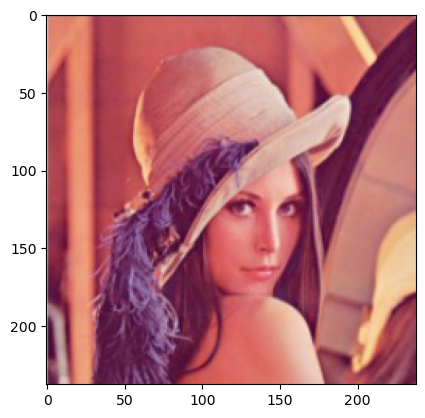

In [32]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt

#https://habrahabr.ru/post/142818/
def checkByte(a):
    if a > 255:
        a = 255
    if a < 0:
        a = 0
    return a
  

def conv(a, b):
    sum = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            sum += a[i][j] * b[i][j]
    return sum
  

def median(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[ceil(len(c)/2)]
  

def max(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[len(c)-1]
  

def min(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[0]

im = Image.open('./lenna.jpg')
pixels = im.load()

plt.imshow(im);

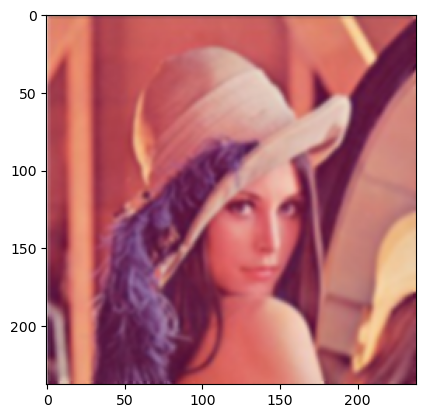

In [33]:
imFinal = im.copy()
pixels2 = imFinal.load()
'''filter = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]
'''
'''
filter = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 4, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]
'''

'''
filter = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
]

'''
'''
filter = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]
'''
'''
'''
filter = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]


div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), im.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), im.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = checkByte(round(conv(matrR, filter) / div))
        g = checkByte(round(conv(matrG, filter) / div))
        b = checkByte(round(conv(matrB, filter) / div))

       # r = checkByte(min(matrR))
       # g = checkByte(min(matrG))
       # b = checkByte(min(matrB))
        '''
        if r < 512:
            pixels2[i, j] = (255, 255, 255)
        else:
            pixels2[i, j] = (0, 0, 0)'''
        pixels2[i, j] = (r, g, b)

plt.imshow(imFinal);

Задача 1

Вычислить размер результата после применения свёртки, $I$ -- размеры входного изображения, $f$ -- размеры фильтра:

1. Пример: $I$ = (50, 50, 3), $f$ = (3, 3), $stride$ = 1. Вычисляем:
* по ширине: 50 - 3 + 1 = 48,  
* по высоте: 50 - 3 + 1 = 48,   
то есть размер результата будет (48, 48)

2. $I$ = (1024, 768, 3), $f$=(5,5), $stride$ = 2. Вычисляем:


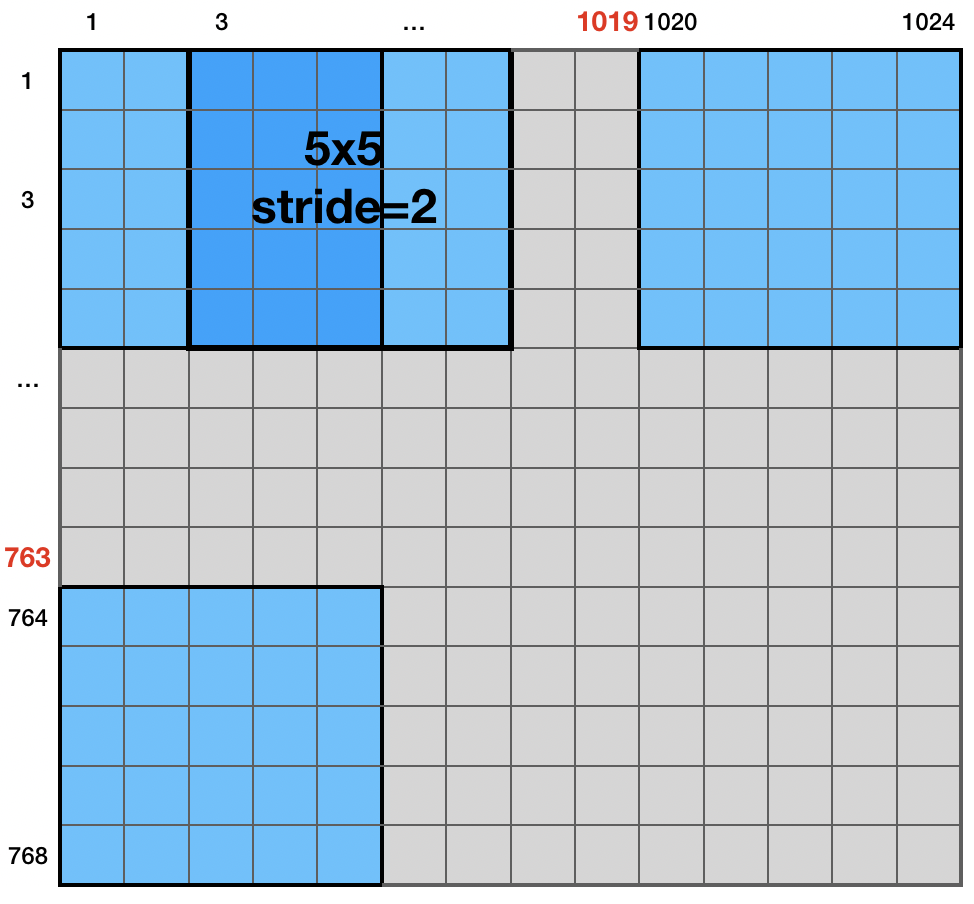

Из рисунка видно, что выходная ширина равна количеству нечентых чисел от 1 до 1020, т. е. 510

Аналогично по высоте получаем 382, то есть размер результата будет (510, 382).

Выведите общую формулу для $I$ = (H, W, C), $f$=(F, F) (фильтры обычно всё же квадратные)

### **Формулы свёртки**

Высота выхода:

$H_{\text{out}} = \left\lfloor \frac{H - F}{S} \right\rfloor + 1$

Ширина выхода:

$W_{\text{out}} = \left\lfloor \frac{W - F}{S} \right\rfloor + 1$

Размер выходного тензора (если фильтров K):

$(H_{\text{out}},\ W_{\text{out}},\ K)$


### **Формулы свёртки с padding**

При входе размера:

$ I = (H, W, C) $

Квадратном фильтре размера:

$ F \times F $

Padding:

$ p $

И шаге (stride):

$ S $

Размеры выходного тензора вычисляются так:

Высота:

$$ H_{\text{out}} = \left\lfloor \frac{H - F + 2p}{S} \right\rfloor + 1 $$

Ширина:

$$ W_{\text{out}} = \left\lfloor \frac{W - F + 2p}{S} \right\rfloor + 1 $$

Если фильтров $K$, итоговая форма результата:

$$ (H_{\text{out}},\ W_{\text{out}},\ K) $$


## Pooling

Pooling (пулинг) -- операция, нужная для уменьшения размерности по ширине и по высоте. Можно брать очень много операций в качестве пулинга, например, минимум из элементов, максимум, среднее, сумму и т.д.

Обычно используется max- и avg-pooling.

Пример применения max-pooling'а:
<img src="https://i.stack.imgur.com/W9a9n.jpg">

Примеры применения max и avg pooling'ов:

<img src="https://www.researchgate.net/profile/Zenghui_Wang2/publication/317496930/figure/fig1/AS:551445004066816@1508486142257/Average-versus-max-pooling.png">

## Subclassing nn.Module

In [34]:
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [35]:
# код для генерации взят из Стэнфордсокго курса:
# http://cs231n.github.io/neural-networks-case-study/#linear

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

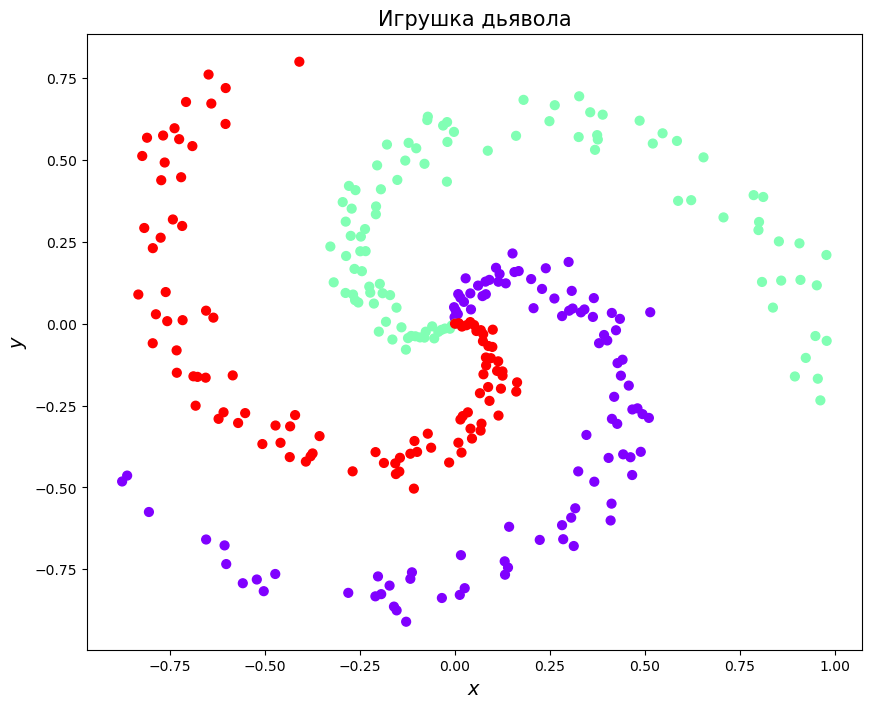

In [36]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [37]:
#Приведение данных к тензору, для работы в пайторче
X = torch.FloatTensor(X) #Действительные числа - флоат тензер
y = torch.LongTensor(y) # Метки классов - можно лонг тензер 

Сейчас мы хотим научиться самостоятельно создавать наследников nn.Module. До этого мы делали нейросети с помощью класса nn.Sequential, попробуем построить такую же сеть, как на прошлом семинаре, но самостоятельно.

In [38]:
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Что такое модуль и как он устроен? Во-первых, модуль это такой строительный блок для нейронок, с помощью модуля можно задать любую дифференциируемую по своему параметру функцию. Применяются модули так же, как и обычные функции с синтаксисом
> module_instance(var1, var2)

При этом внутри вызывается функция forward с теми же аргументами, а ее выход возвращается как результат вызова модуля. Зачем же нужно так странно оборачивать обычные функции в модули? 

* Это позволяет очень удобно следить за параметрами, которые надо изменять. Когда мы хоти получить все параметры можно просто рекурсивно пройтись по всем полям модели, посмотреть, какие из ни параметры сами по себе, а какие являются модулями и содрежат параметры внутри, а потом все это собрать. 

_По этой причине если вы используете внутри своего модуля какие-то еще модули их надо класть просто в поле класса, если это единичный модуль, и в класс **nn.ModuleList** или **nn.ModuleDict**, если у вас список или словарь используемых модулей. Если же в модели у вас есть како-то собственный вес, то недостаточно положить тензор в поле класса, его надо обернуть в **nn.Parameter, nn.ParameterList** или **nn.ParameterDict** в зависимотси от того, что именно у вас._

* Такая организация позволяет достаточно безболезненно расширять PyTorch и писать для него свои функции, которые нельзя выразить композицией уже существующих. Пригождается это редко, поэтому сегодня мы не будем писать свое расширение.

* Код, разделенный на модули, это просто красиво.

In [39]:
# НОВАЯ СЕТЬ

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.f_lin = nn.Linear(D_in, H)
        self.s_lin = nn.Linear(H, D_out)
        
    def forward(self, X):
        X = F.relu(self.f_lin(X))
        return self.s_lin(X)
    
model = MyModule()
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), 1e-1)

Поговорим немного подробнее о `softmax` и `CrossEntropyLoss`. 

Напоминание: softmax-функция выглядит следующим образом
$$Softmax(x) = \begin{pmatrix} 
\dfrac{e^{x_1}}{\sum\limits_{i=0}^{m} e^{x_i}},\; \dots,\; \dfrac{e^{x_m}}{\sum\limits_{i=0}^{m} e^{x_i}}
\end{pmatrix} $$

Таким образом, после применения softmax-функции мы получили вектор чисел из интервала $(0, 1)$, которые мы будем интерпретировать как вероятности классов.

Аналогично тому, как мы обощили сигмоиду на многоклассовый случай и получили softmax, можно обобщить и функцию потерь, получив _кросс-энтропию_:

$$CrossEntropy(x) = -\sum\limits_{i=0}^m y_i \cdot log(Softmax(x)_i), $$

где $y_i$ – истинная метка класса ($1$ если $x$ принадлежит $i$-ому классу и $0$ иначе)

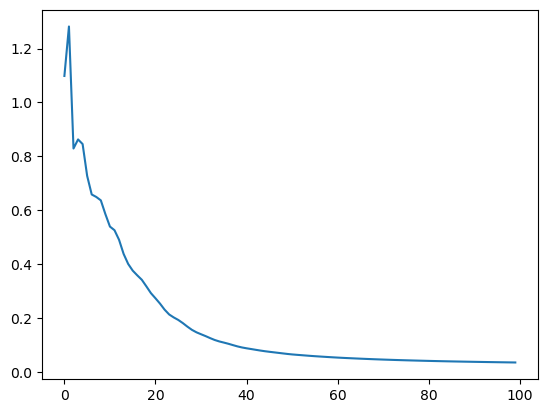

In [40]:
losses = []
for t in range(100):
    # forward
    y_pred = model(X)

    # loss
    loss = loss_fn(y_pred, y)
    losses.append(loss.item())

    optim.zero_grad()
    loss.backward()
    optim.step()
    
plt.plot(losses)

In [41]:
# Сеть без параметров

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layers = [nn.Linear(D_in, H), nn.Linear(H, D_out)]
        self.my_useless_bias = torch.ones(1, H, requires_grad=True)
        self.more_of_my_useless_biases = [
            torch.ones(1, H, requires_grad=True),
            torch.ones(1, H, requires_grad=True),
            torch.ones(1, H, requires_grad=True)
        ]
        
    def forward(self, X):
        X = F.relu(self.linear_layers[0](X))
        X += self.my_useless_bias
        return F.softmax(self.linear_layers[1](X))
    
model = MyModule()
list(model.parameters())

[]

Как мы и ожидали параметров нет. Исправим это.

In [42]:
# Исправленная сеть с параметрами

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layers = nn.ModuleList([nn.Linear(D_in, H), nn.Linear(H, D_out)])
        self.my_useless_bias = nn.Parameter(torch.ones(1, H, requires_grad=True))
        self.more_of_my_useless_biases = nn.ParameterList([
            nn.Parameter(torch.ones(1, H, requires_grad=True)),
            nn.Parameter(torch.ones(1, H, requires_grad=True)),
            nn.Parameter(torch.ones(1, H, requires_grad=True))
        ])
        
    def forward(self, X):
        X = F.relu(self.linear_layers[0](X))
        X += self.my_useless_bias
        for b in self.more_of_my_useless_biases:
            X += b
        return F.softmax(self.linear_layers[1](X))
    
model = MyModule()
list(model.parameters())

[Parameter containing:
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True),
 Parameter containing:
 tensor([[-0.0110,  0.4890],
         [ 0.6894, -0.2851],
         [-0.0720,  0.1569],
         [-0.6740, -0.6149],
         [-0.3672,  0.4626],
         [ 0.4606, -0.2878],
         [ 0.5432, -0.6713],
         [ 0.2055,  0.1981],
         [-0.2464,  0.4557],
         [-0.1585,  0.3181],
         [-0.5407, -0.2762],
         [ 0.6240, -0.0676],
         [-0.2673, -0.2304],
         [ 0.6640,  0.1988],
         [-0.6159, -0.4859],
         [ 0.1603, -0.4902],
       

Как мы и хотели, все параметры появились

# MNIST

***Свёрточная нейросеть (Convolutional Neural Network, CNN)*** - это многослойная нейросеть, имеющая в своей архитектуре помимо *полносвязных слоёв* (а иногда их может и не быть) ещё и **свёрточные слои (Conv Layers)** и **pooling-слои (Pool Layers)**.  

Собственно, название такое эти сети получили потому, что в основе их работы лежит операция **свёртки**. 


Сразу же стоит сказать, что свёрточные нейросети **были придуманы прежде всего для задач, связанных с картинками**, следовательно, на вход они тоже "ожидают" картинку.

Расмотрим их устройство более подробно:

Свёрточные нейросети (обыкновенные, есть и намного более продвинутые) почти всегда строятся по следующему правилу:  

`INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC`  

то есть:  

1). ***Входной слой*** (batch картинок `HxWxC`)  

2). $M$ блоков (M $\ge$ 0) из свёрток и pooling-ов, причём именно в том порядке, как в формуле выше. Все эти $M$ блоков вместе называют ***feature extractor*** свёрточной нейросети, потому что эта часть сети отвечает непосредственно за формирование новых, более сложных признаков, поверх тех, которые подаются (то есть, по аналогии с MLP, мы опять же переходим к новому признаковому пространству, однако здесь оно строится сложнее, чтем в обычных многослойных сетях, поскольку используется операция свёртки)  

3). $K$ штук FullyConnected-слоёв (с активациями). Эту часть из $K$ FC-слоёв называют ***classificator***, поскольку эти слои отвечают непосредственно за предсказание нужно класса (сейчас рассматривается задача классификации изображений).

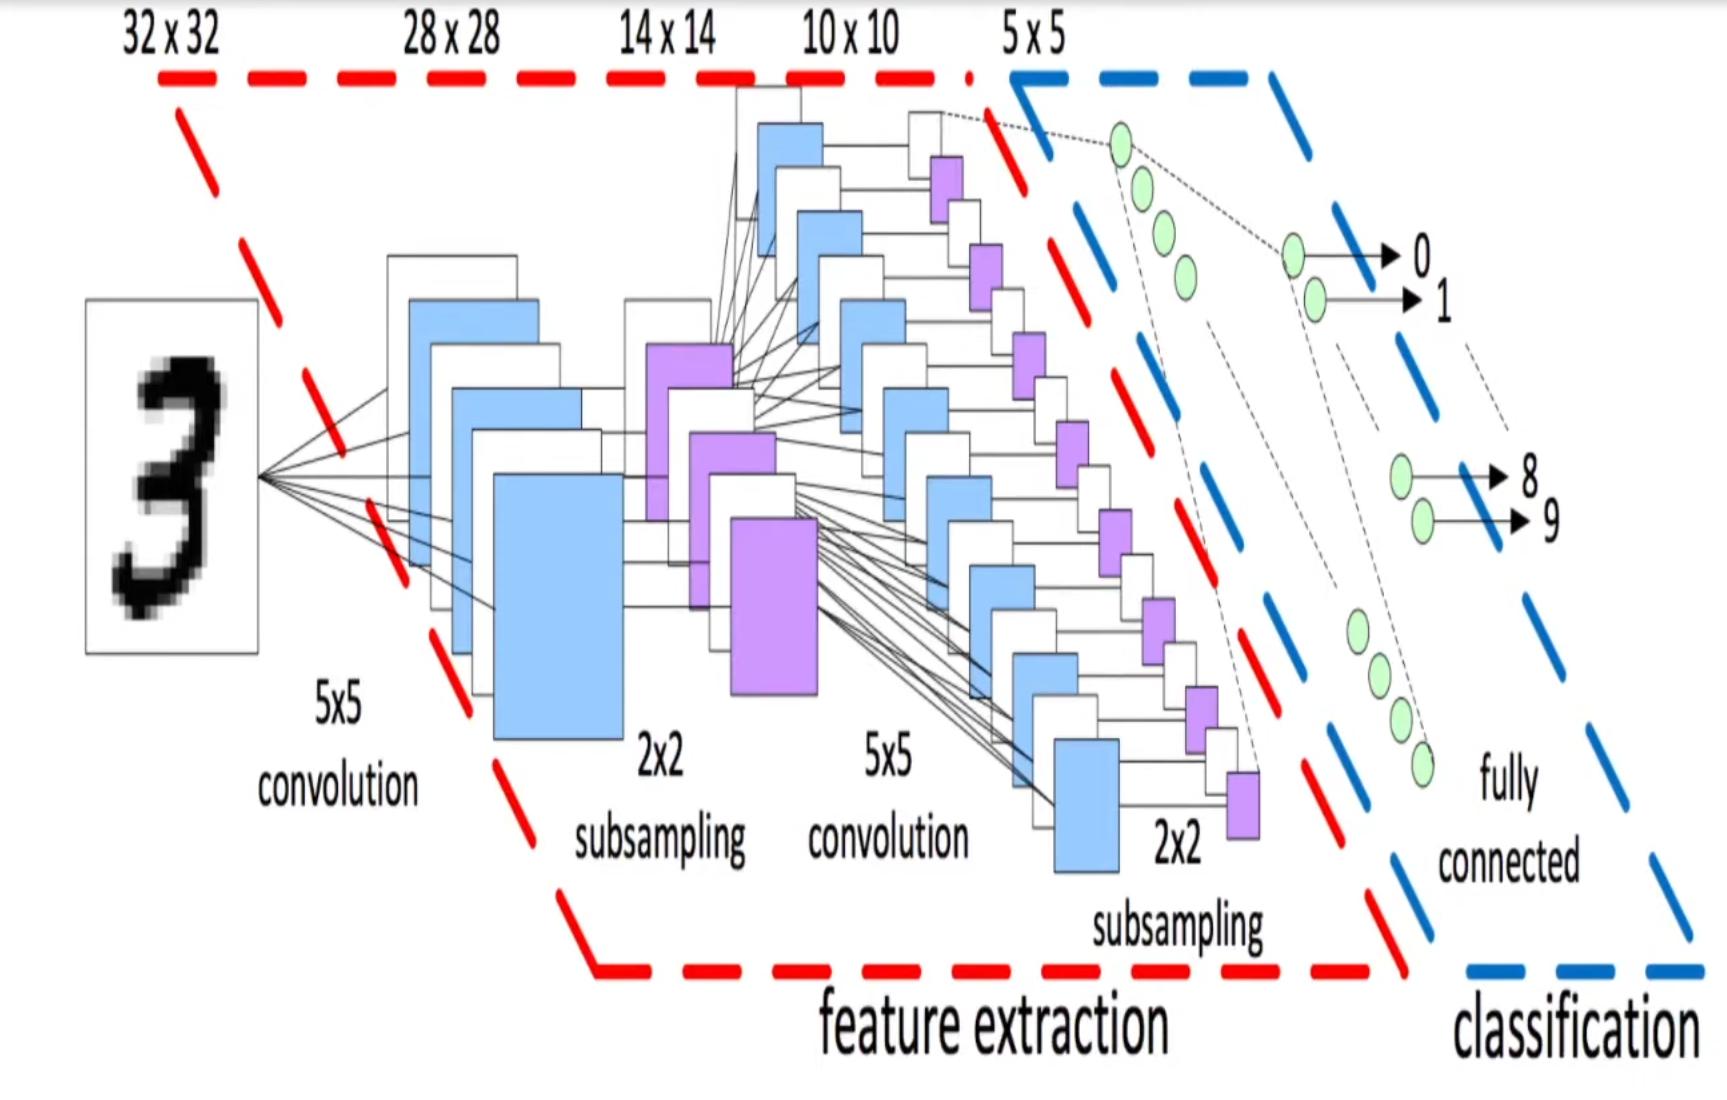


<h3 style="text-align: center;"><b>Свёрточная нейросеть на PyTorch</b></h3>

Ешё раз напомним про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

Так как мы сейчас рассматриваем **архитектуру CNN**, то, помимо этих компонент, в свёрточной нейросети можно настроить следующие вещи:  

- (в каждом ConvLayer) **размер фильтров (окна свёртки)** (`kernel_size`)
- (в каждом ConvLayer) **количество фильтров** (`out_channels`)  
- (в каждом ConvLayer) размер **шага окна свёртки (stride)** (`stride`)  
- (в каждом ConvLayer) **тип padding'а** (`padding`)  


- (в каждом PoolLayer) **размер окна pooling'a** (`kernel_size`)  
- (в каждом PoolLayer) **шаг окна pooling'а** (`stride`)  
- (в каждом PoolLayer) **тип pooling'а** (`pool_type`)  
- (в каждом PoolLayer) **тип padding'а** (`padding`)

In [43]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt  # для отрисовки картиночек
%matplotlib inline

# Проверяем, доступны ли GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

<img src="http://present5.com/presentation/20143288_415358496/image-8.jpg" width=500, height=400>

**MNIST:** это набор из 70k картинок рукописных цифр от 0 до 9, написанных людьми, 60k из которых являются тренировочной выборкой (`train` dataset)), и ещё 10k выделены для тестирования модели (`test` dataset).

Скачаем и загрузим в `loader`'ы:

In [44]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2) 
#num_workers - Количество рабочих процессов, которые параллельно будут загружать данные. 
#0 - всё грузится в основном процессе. 2 - два подпроцесса отвечают за загрузку/преобразование батчей

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = tuple(str(i) for i in range(10))

Сами данные лежат в полях `trainloader.dataset.train_data` и `testloader.dataset.test_data`:

In [45]:
trainloader.dataset.data.shape #изображения черно-белые, поэтому нет третьей размерности

torch.Size([60000, 28, 28])

In [46]:
testloader.dataset.data.shape

torch.Size([10000, 28, 28])

In [47]:
trainloader.dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Посмотрим, как она выглядит:

In [48]:
# преобразовать тензор в np.array
numpy_img = trainloader.dataset.data[0].numpy()

In [49]:
numpy_img.shape

(28, 28)

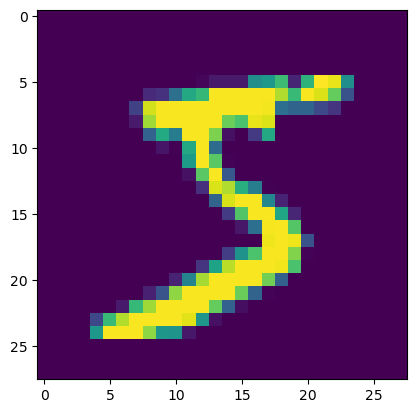

In [50]:
plt.imshow(numpy_img);

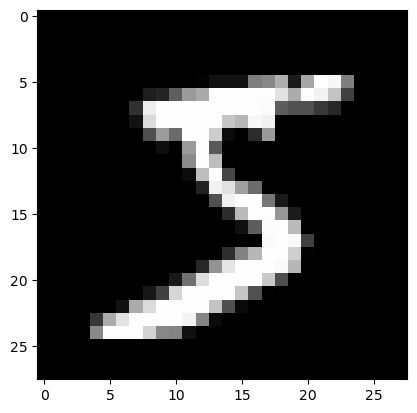

In [51]:
plt.imshow(numpy_img, cmap='gray');

Отрисовка заданной цифры:

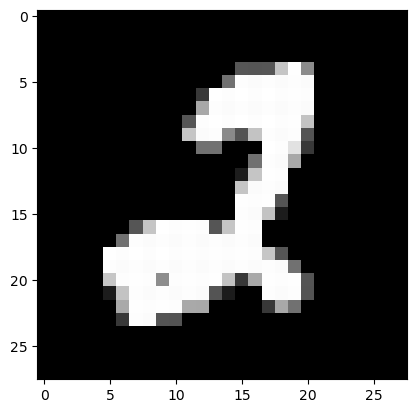

In [52]:
# случайный индекс от 0 до размера тренировочной выборки
i = np.random.randint(low=0, high=60000)

plt.imshow(trainloader.dataset.data[i].numpy(), cmap='gray');

Как итерироваться по данным с помощью loader'а

In [53]:
for data in trainloader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
   

То есть мы имеем дело с кусочками данных размера batch_size (в данном случае = 4), причём в каждом батче есть как объекты, так и ответы на них (то есть и $X$, и $y$).

Теперь вернёмся к тому, что в PyTorch есть две "парадигмы" построения нейросетей -- `Functional` и `Seuquential`. Мы испольузем именно `Functional` парадигму, потому что при построении свёрточных сетей это намного удобнее:

In [54]:
import torch.nn as nn
import torch.nn.functional as F  # Functional

In [55]:
# ЗАМЕТЬТЕ: КЛАСС НАСЛЕДУЕТСЯ ОТ nn.Module
class SimpleConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(4 * 4 * 16, 120)  # !!!
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 4 * 4 * 16)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [56]:
net = SimpleConvNet()

summary(net.cuda(), (1,28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 120]          30,840
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.22
----------------------------------------------------------------


In [57]:
batch = []


batch = next(iter(trainloader))

net.forward(torch.FloatTensor(batch[0]).cuda())

tensor([[ 0.0177,  0.0042,  0.0053,  0.0035, -0.0878, -0.1464,  0.1212, -0.0528,
          0.1519,  0.1285],
        [ 0.0155,  0.0130,  0.0124, -0.0038, -0.0985, -0.1321,  0.1262, -0.0620,
          0.1600,  0.1280],
        [ 0.0210,  0.0068,  0.0016, -0.0046, -0.0896, -0.1445,  0.1203, -0.0540,
          0.1548,  0.1282],
        [ 0.0207,  0.0087, -0.0028,  0.0034, -0.0893, -0.1422,  0.1244, -0.0681,
          0.1511,  0.1258]], device='cuda:0', grad_fn=<AddmmBackward0>)

**Важное примечание:** Вы можете заметить, что в строчках с `#!!!` есть не очень понятный сходу 4 `*` 4 `*` 16. Это -- размерность картинки перед FC-слоями (H x W x C), тут её приходиться высчитывать вручную (в Keras, например, `.Flatten()` всё делает за Вас). Однако есть один *лайфхак* -- просто сделайте в `forward()` `print(x.shape)` (закомментированная строка). Вы увидите размер `(batch_size, C, H, W)` -- нужно перемножить все, кроме первого (batch_size), это и будет первая размерность `Linear()`, и именно в C * H * W нужно "развернуть" x перед подачей в `Linear()`.  

То есть нужно будет запустить цикл с обучением первый раз с `print()` и сделать после него `break`, посчитать размер, вписать его в нужные места и стереть `print()` и `break`.

Код обучения слоя:

In [58]:
from tqdm.notebook import tqdm #прогресс-бары

In [59]:
# объявляем сеть
net = SimpleConvNet().to(device)

In [60]:
# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate) #net.parameters() возвращает генератор всех обучаемых параметров модели
losses = []

In [61]:
cnt = 0
temp = 0
for i, batch in enumerate(tqdm(trainloader)):  #enumerate используется для добавления индекса к каждому элементу, получаемому из итератора
        # так получаем текущий батч
        X_batch, y_batch = batch
        cnt = i
        if i % 2000 == 1999:
          temp += 1 
cnt,temp

  0%|          | 0/15000 [00:00<?, ?it/s]

(14999, 7)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 0.996
[1,  4000] loss: 0.363
[1,  6000] loss: 0.286
[1,  8000] loss: 0.235
[1, 10000] loss: 0.186
[1, 12000] loss: 0.186
[1, 14000] loss: 0.151


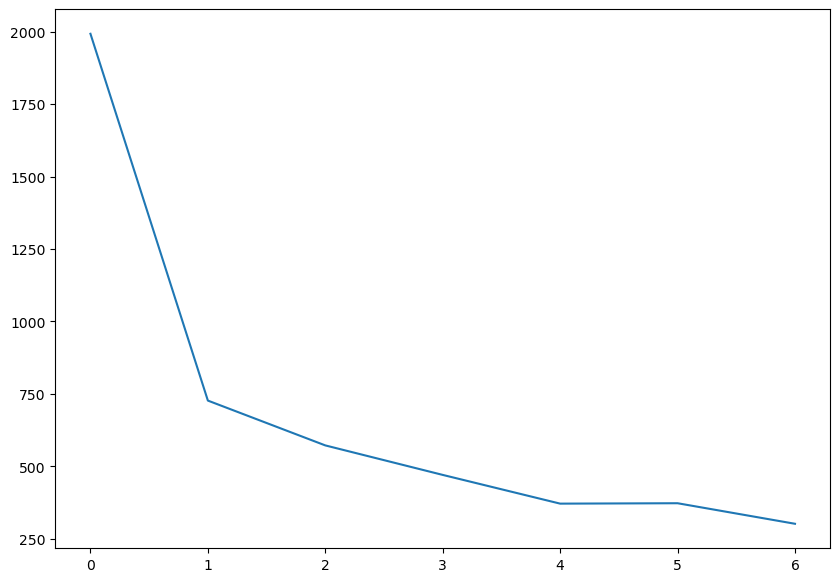

  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.137
[2,  4000] loss: 0.117
[2,  6000] loss: 0.112
[2,  8000] loss: 0.116
[2, 10000] loss: 0.108
[2, 12000] loss: 0.102
[2, 14000] loss: 0.094
Обучение закончено


In [62]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

# итерируемся
for epoch in tqdm(range(2)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss)
            running_loss = 0.0

    ax.clear()
    ax.plot(np.arange(len(losses)), losses)
    plt.show()

print('Обучение закончено')

In [63]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad(): #чтобы не обновалять градиенты
    for data in testloader:
        images, labels = data
        y_pred = net(images.to(device)) # y_pred — это тензор логитов размером [batch_size, 10]
        _, predicted = torch.max(y_pred, 1) # 1 — это ось, по которой нужно найти максимальное значение. В данном случае ось 1 — это ось классов
        #torch.max(y_pred, 1) Выдает два значения. 1 - значение максимального логита, 2 - его индекс, который в нашем случае совпадает с меткой класса
        c = (predicted.cpu() == labels) #сравнивает предсказания с истинными метками. Результат — это булевый тензор той же длины, что и батч
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item() #c[i].item() — преобразует булевое значение в 0 или 1
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 99 %
Accuracy of     2 : 98 %
Accuracy of     3 : 97 %
Accuracy of     4 : 95 %
Accuracy of     5 : 98 %
Accuracy of     6 : 96 %
Accuracy of     7 : 97 %
Accuracy of     8 : 96 %
Accuracy of     9 : 96 %


# CIFAR10

<img src="https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/cifar10.png" width=500, height=400>

**CIFAR10:** это набор из 60k картинок 32х32х3, 50k которых составляют обучающую выборку, и оставшиеся 10k - тестовую. Классов в этом датасете 10: `'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'`.

Скачаем и загрузим в `loader`'ы:

**Обратите внимание на аргумент `batch_size`:** именно он будет отвечать за размер батча, который будет подаваться при оптимизации нейросети

In [64]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
from tqdm.notebook import tqdm #прогресс-бары
import numpy as np
import torch.nn as nn
import torch.nn.functional as F  # Functional
import matplotlib.pyplot as plt  # для отрисовки картиночек
%matplotlib inline

# Проверяем, доступны ли GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [65]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]) #ToTensor() делает пиксели в диапазоне [0, 1].
    #transforms.Normalize(mean, std) берёт каждый пиксель изображения и стандартизирует его x = (x - mean)/std
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


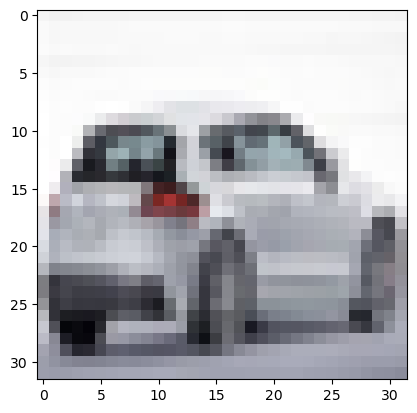

In [66]:
# случайный индекс от 0 до размера тренировочной выборки
i = np.random.randint(low=0, high=50000)

plt.imshow(trainloader.dataset.data[i]);

То есть мы имеем дело с кусочками данных размера batch_size (в данном случае = 4), причём в каждом батче есть как объекты, так и ответы на них (то есть и $X$, и $y$).

Данные готовы, мы даже на них посмотрели.

Напишите свою свёрточную нейросеть для предсказания на CIFAR10.

In [67]:
next(iter(trainloader))[0].shape

torch.Size([128, 3, 32, 32])

In [68]:
class MyConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super().__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 3),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.fc1 = nn.Linear(6 * 6 * 128, 128)  # !!!
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        #(32,32)
        x = self.pool(F.relu(self.conv1(x)))
        #(14,14)
        x = self.pool(F.relu(self.conv2(x)))
        #(6,6)
        #print(x.shape)
        x = x.view(-1, 6 * 6 * 128)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Обучим:

In [69]:
# пример взят из официального туториала: 
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

net = MyConvNet().to(device)

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
for epoch in tqdm(range(10)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выводем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение закончено')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

Обучение закончено


Посмотрим на accuracy на тестовом датасете:

In [70]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images.to(device))#.view(4, -1))
        _, predicted = torch.max(y_pred, 1)
        c = (predicted.cpu().detach() == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 83 %
Accuracy of  bird : 45 %
Accuracy of   cat : 44 %
Accuracy of  deer : 56 %
Accuracy of   dog : 60 %
Accuracy of  frog : 77 %
Accuracy of horse : 75 %
Accuracy of  ship : 82 %
Accuracy of truck : 64 %


Попытаемся улучить

Начнем с архитектуры сети

In [71]:
class BetterConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super().__init__()
        # Блок 1: 3 -> 32 каналов
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,padding = 1, stride = 1)
        self.bn1 = nn.BatchNorm2d(32)

        # Блок 2: 32 -> 64 каналов
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,padding = 1, stride = 1)
        self.bn2 = nn.BatchNorm2d(64)

        # Блок 3: 64 -> 128 каналов
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size=3,padding = 1, stride = 1)
        self.bn3 = nn.BatchNorm2d(128)
                
        # MaxPool во всех блоках один и тот же
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # После трёх пуллингов:
        # 32x32 -> 16x16 -> 8x8 -> 4x4
        # Значит размер фичей: 128 * 4 * 4
        
        self.fc1 = nn.Linear(4 * 4 * 128, 256) 
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # Вход: (B, 3, 32, 32)
        # Блок 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))   # -> (B, 32, 16, 16)
        # Блок 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))   # -> (B, 64, 8, 8)
        # Блок 3
        x = self.pool(F.relu(self.bn3(self.conv3(x))))   # -> (B, 128, 4, 4)

        # Расплющиваем
        x = x.view(x.size(0),-1)    # (B, 128*4*4)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)# логиты (B, 10)
        return x

In [72]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net = BetterConvNet().to(device)

loss_fn = nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=1e-4) # weight_decay = L2-регуляризация
num_epochs = 20 


In [73]:
for epoch in tqdm(range(num_epochs)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выводем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение закончено')

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

Обучение закончено


In [74]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images.to(device))#.view(4, -1))
        _, predicted = torch.max(y_pred, 1)
        c = (predicted.cpu().detach() == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 89 %
Accuracy of   car : 92 %
Accuracy of  bird : 75 %
Accuracy of   cat : 52 %
Accuracy of  deer : 66 %
Accuracy of   dog : 66 %
Accuracy of  frog : 77 %
Accuracy of horse : 84 %
Accuracy of  ship : 90 %
Accuracy of truck : 71 %


Результат стал значительно лучше

In [76]:
# ТРЕНИРОВОЧНЫЕ ТРАНСФОРМЫ (с аугментацией)
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4), # увеличивает картинку до 40×40 а затем случайно вырезает из неё участок размером 32×32.
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2023, 0.1994, 0.2010)
    ),
])

# ТЕСТОВЫЕ ТРАНСФОРМЫ (БЕЗ аугментации!)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2023, 0.1994, 0.2010)
    ),
])


In [79]:
net = BetterConvNet().to(device)
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=1e-4) # weight_decay = L2-регуляризация
num_epochs = 20

In [80]:
for epoch in tqdm(range(num_epochs)):
    net.train()
    running_loss = 0.0
    for i, batch in enumerate(tqdm(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выводем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение закончено')

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

Обучение закончено


In [82]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images.to(device))#.view(4, -1))
        _, predicted = torch.max(y_pred, 1)
        c = (predicted.cpu().detach() == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 78 %
Accuracy of   car : 86 %
Accuracy of  bird : 72 %
Accuracy of   cat : 70 %
Accuracy of  deer : 80 %
Accuracy of   dog : 60 %
Accuracy of  frog : 75 %
Accuracy of horse : 84 %
Accuracy of  ship : 88 %
Accuracy of truck : 91 %
